*Import Library*

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [59]:
def plot_confusion_matrix(actual, predicted, labels, ds_type):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(12, 12)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of action recognition for ' + ds_type)
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

*Data Folders*

In [60]:
DataTrain = 'Data_Preprocessing/Data_Binary_F_NM/Training'
DataVal = 'Data_Preprocessing/Data_Binary_F_NM/Validation'
DataTest = 'Data_Preprocessing/Data_Binary_F_NM/Test'
Pre_Data= 'Data_Preprocessing/Pre_Data_FNM'

*Preprocessing Data*

In [62]:
seed=4
imsize=64
batchsize=8
shuffle_train_val=True
shuffle_test=False

tf.config.experimental.enable_op_determinism()
tf.random.set_seed(seed)
train_generator = (ImageDataGenerator(
    rescale = 1. / 255.,
    horizontal_flip=True,
    fill_mode='nearest')).flow_from_directory(
    DataTrain, 
    save_to_dir=Pre_Data,
    target_size = (imsize, imsize),
    batch_size = batchsize,    
    color_mode='grayscale',
    seed=seed,
    shuffle=shuffle_train_val,
    class_mode='binary')

validation_generator = (ImageDataGenerator(rescale = 1. / 255)).flow_from_directory(
        DataVal,
        target_size=(imsize, imsize),
        batch_size= batchsize,
        color_mode='grayscale',
        seed=seed,
        shuffle=shuffle_train_val,
        class_mode='binary')

test_generator = (ImageDataGenerator(rescale = 1. / 255)).flow_from_directory(
        DataTest,
        target_size=(imsize, imsize),
        batch_size= batchsize,
        color_mode='grayscale',
        seed=None,
        shuffle=shuffle_test,
        class_mode='binary')

model_cnn_label = test_generator.class_indices
print(model_cnn_label)

Found 206 images belonging to 2 classes.
Found 52 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
{'Ferromagnetic': 0, 'Non_Magnetic': 1}


Building *Convolutional Neural Network*

In [25]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding="same", input_shape=(imsize, imsize, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

d:\projects\cnn-mp-dos\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,257 (122.10 KB)

 Trainable params: 31,081 (121.41 KB)

 Non-trainable params: 176 (704.00 B)

*Callback*

In [26]:
model_filename = "Model/F_NM/CNN_Binary_F_NM_{epoch}.keras"
best_model = tf.keras.callbacks.ModelCheckpoint(
    filepath = model_filename,
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
    initial_value_threshold=None
)

Model Compilation

In [ ]:
model.compile(optimizer = "Adam", loss="binary_crossentropy", metrics=["accuracy"])

Model Training

In [29]:
history = model.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=[best_model])

Epoch 1/100


d:\projects\cnn-mp-dos\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5045 - loss: 0.7743 - val_accuracy: 0.5192 - val_loss: 0.6935
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5869 - loss: 0.6777 - val_accuracy: 0.5192 - val_loss: 0.6920
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6008 - loss: 0.6590 - val_accuracy: 0.5192 - val_loss: 0.6904
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7159 - loss: 0.5716 - val_accuracy: 0.4808 - val_loss: 0.6883
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6606 - loss: 0.5858 - val_accuracy: 0.5192 - val_loss: 0.6870
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6935 - loss: 0.5800 - val_accuracy: 0.5192 - val_loss: 0.6874
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5697 - loss: 0.6216 - val_accuracy: 0.5192 - val_loss: 0.6925
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7315 - loss: 0.5534 - val_accuracy: 0.5192 - val_l

*Model Accuracy*

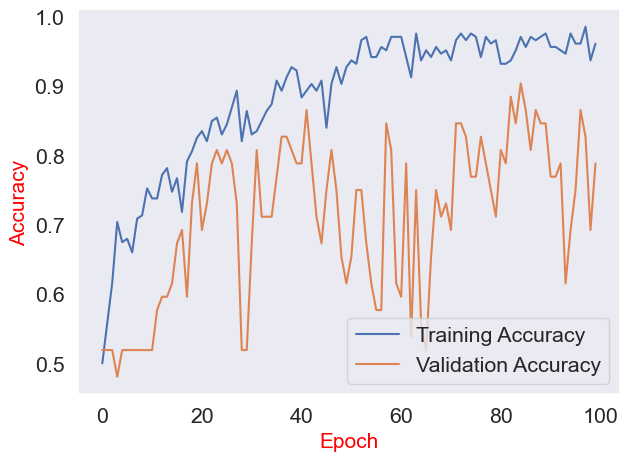

In [30]:
plt.subplots(figsize=(7, 5));
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.ylabel('Accuracy', color='red', fontsize = 15);
plt.xlabel('Epoch', color='red', fontsize = 15);
plt.legend(['Training Accuracy', 'Validation Accuracy']);
plt.grid()

 *Model Loss*

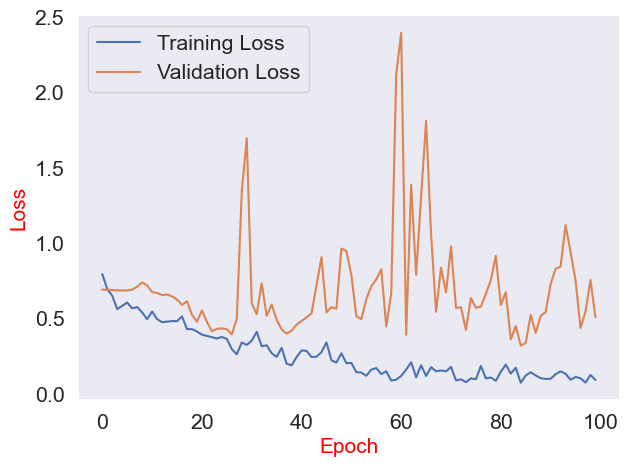

In [31]:
plt.subplots(figsize=(7, 5));
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.ylabel('Loss', color='red', fontsize = 15);
plt.xlabel('Epoch', color='red', fontsize = 15);
plt.legend(['Training Loss', 'Validation Loss']);
plt.grid()

*Model Evaluation*

In [ ]:
model.evaluate(train_generator, batch_size = batchsize)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9733 - loss: 0.0754


[0.0770379900932312, 0.9708737730979919]

In [33]:
model.evaluate(validation_generator, batch_size = batchsize)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8229 - loss: 0.4721


[0.5096923112869263, 0.7884615659713745]

In [49]:
model.evaluate(test_generator, batch_size = 30)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5458 - loss: 2.3552


[1.513498306274414, 0.6666666865348816]

*Best Model Evaluation*

In [35]:
#Finding best model (best accuracy) 
import os
Model_folder='Model/F_NM/'
dir_list = os.listdir(Model_folder)
best_model=''
acc_max=-1
input_data=test_generator
for filename in dir_list:
    # print(filename)
    model_check = tf.keras.models.load_model(Model_folder+filename)
    predicted_class =((model_check.predict(input_data) > .5).astype(int).flatten())
    actual_class = input_data.classes
    report=classification_report(actual_class, predicted_class, target_names=['Ferromagnetic', 'Non_Magnetic'],output_dict=True)
    if report['accuracy']>acc_max:
        best_model=Model_folder+filename
        acc_max=report['accuracy']

model_eval = tf.keras.models.load_model(best_model)
predicted_class =((model_eval.predict(test_generator) > .5).astype(int).flatten())
actual_class = test_generator.classes

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


d:\projects\cnn-mp-dos\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\projects\cnn-mp-dos\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\projects\cnn-mp-dos\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


d:\projects\cnn-mp-dos\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\projects\cnn-mp-dos\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\projects\cnn-mp-dos\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


d:\projects\cnn-mp-dos\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\projects\cnn-mp-dos\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\projects\cnn-mp-dos\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


d:\projects\cnn-mp-dos\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\projects\cnn-mp-dos\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\projects\cnn-mp-dos\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Best model:  Model/F_NM/CNN_Binary_F_NM_19.keras
               precision    recall  f1-score   support

Ferromagnetic       0.82      0.60      0.69        15
 Non_Magnetic       0.68      0.87      0.76        15

     accuracy                           0.73        30
    macro avg       0.75      0.73      0.73        30
 weighted avg       0.75      0.73      0.73        30



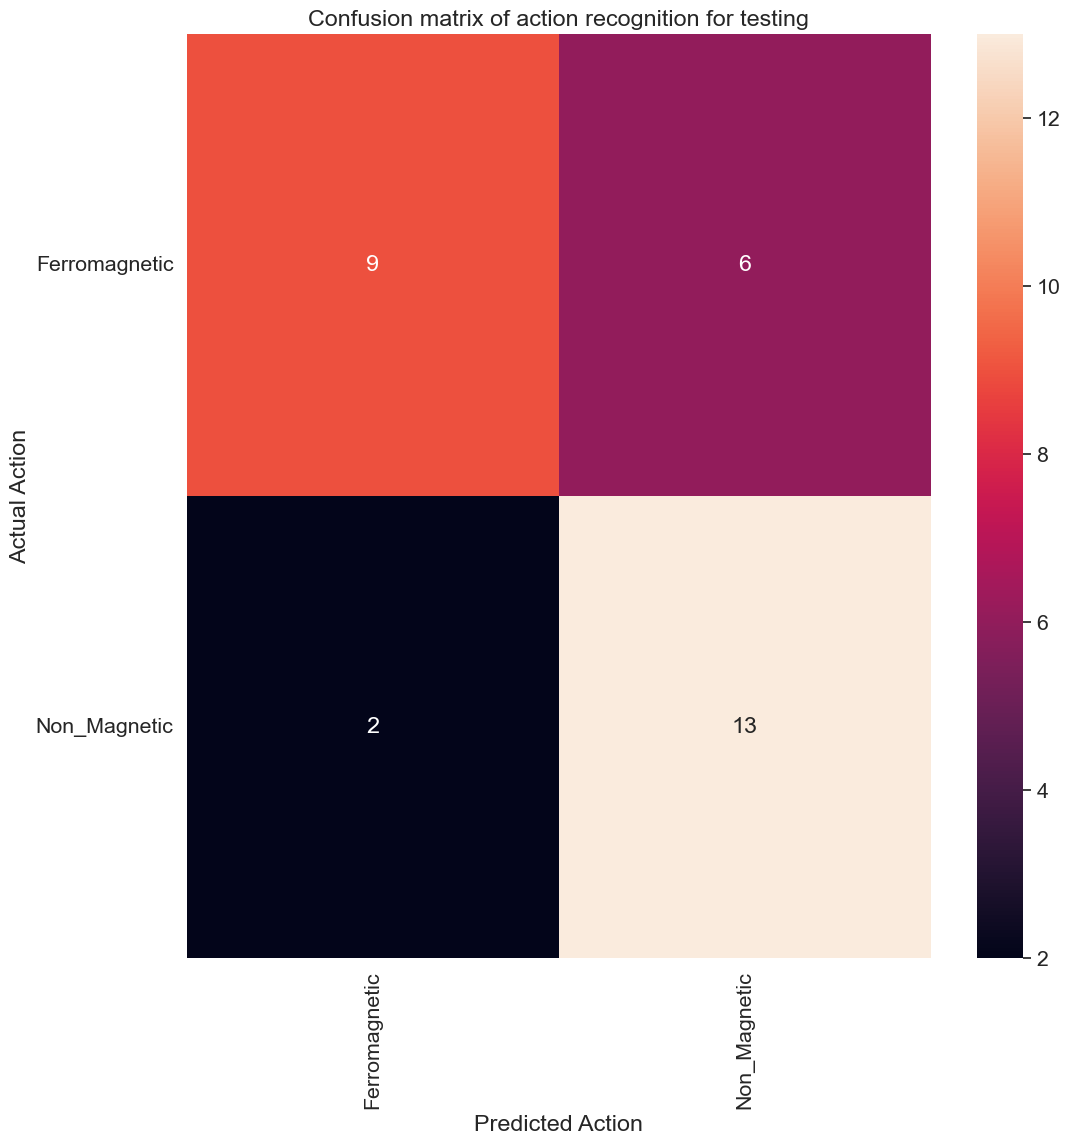

In [36]:
plot_confusion_matrix(actual_class,predicted_class,['Ferromagnetic', 'Non_Magnetic'],'testing')
report=classification_report(actual_class, predicted_class, target_names=['Ferromagnetic', 'Non_Magnetic'])
print('Best model: ', best_model)
print('=======================================================')
print(report)

In [37]:
# input_data=validation_generator
# model_eval = tf.keras.models.load_model(best_model)
# predicted_class =((model_eval.predict(input_data) > .5).astype(int).flatten())
# actual_class = input_data.classes
# plot_confusion_matrix(actual_class,predicted_class,['Ferromagnetic', 'Non_Magnetic'],'validation')
# report=classification_report(actual_class, predicted_class, target_names=['Ferromagnetic', 'Non_Magnetic'])
# print('Best model: ', best_model)
# print('=======================================================')
# print(report)

In [38]:
# model_eval.evaluate(test_generator) #, batch_size = batchsize)

In [39]:
# Display classification report and accuracy score for softmax classifier
# from sklearn.metrics import classification_report, accuracy_score

# new_test_datagen = ImageDataGenerator(rescale=1./255)
# new_test_generator = new_test_datagen.flow_from_directory(DataTest,
#                                   target_size=(imsize,imsize),
#                                     color_mode='grayscale',
#                                     seed=None,
#                                     shuffle=False,
#                                     class_mode='binary')

# softmax_y_true = new_test_generator.classes
# softmax_y_pred = model_eval.predict(new_test_generator)
# softmax_y_pred = np.array(list(map(lambda x: np.argmax(x),softmax_y_pred)))

# print("Accuracy: {0}".format(accuracy_score(softmax_y_true, softmax_y_pred)))